In [11]:
import os
import random
import glob
import math
import matplotlib.pyplot as plt
from PIL import Image

def visualize_images(folder, n=10, colormap=None):
    """
    Displays up to n images from the given folder in a grid of 5 columns.
    
    :param folder: Path to the folder containing .png images.
    :param n: Number of images to display.
    :param colormap: A string (e.g., 'magma', 'viridis') or a matplotlib Colormap object.
                     If None, defaults to grayscale for single-channel images.
    """
    image_paths = sorted(glob.glob(os.path.join(folder, "*.png")))
    random.seed(42)  # For reproducibility
    random.shuffle(image_paths)
    image_paths = image_paths[:n]  # pick the first n (or you could randomize)

    num_cols = 5
    num_rows = math.ceil(len(image_paths) / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten() if num_rows > 1 else [axes]

    for i, path in enumerate(image_paths):
        # Open as grayscale
        img = Image.open(path).convert('L')  
        
        ax = axes[i]
        ax.imshow(img, cmap=colormap if colormap is not None else 'gray')
        ax.set_title(os.path.basename(path))
        ax.axis("off")

    # Hide leftover subplots if n < num_rows*num_cols
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


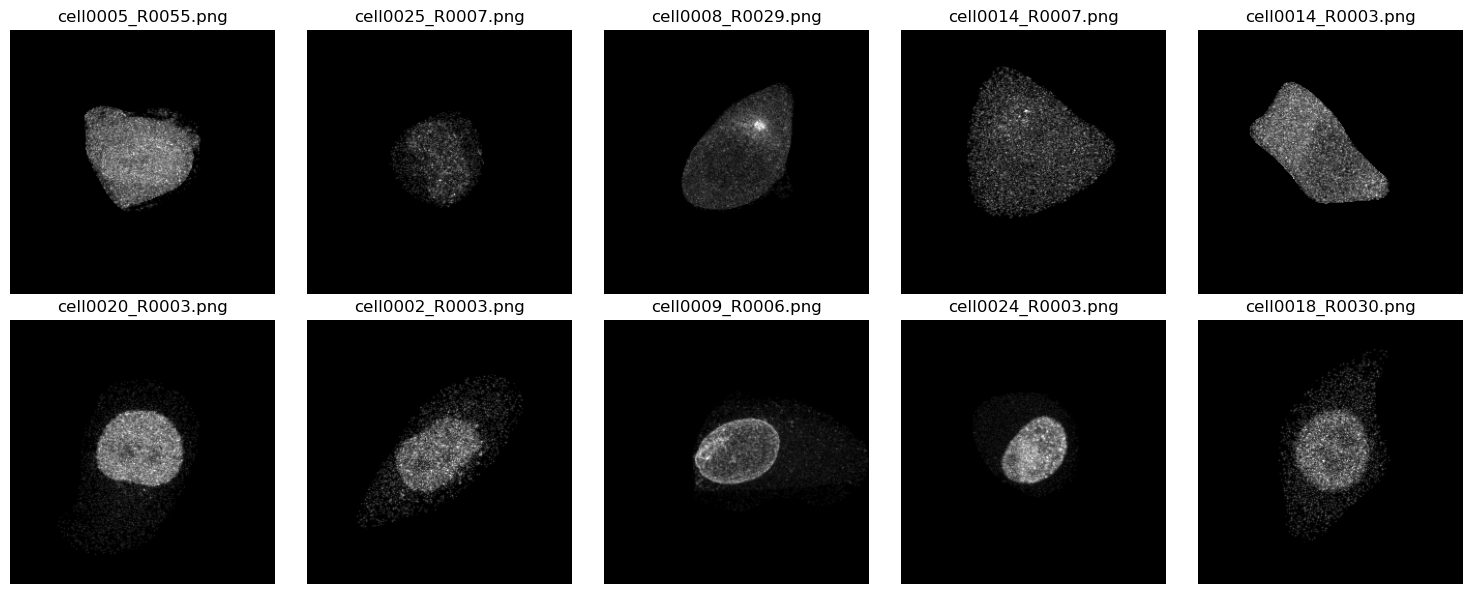

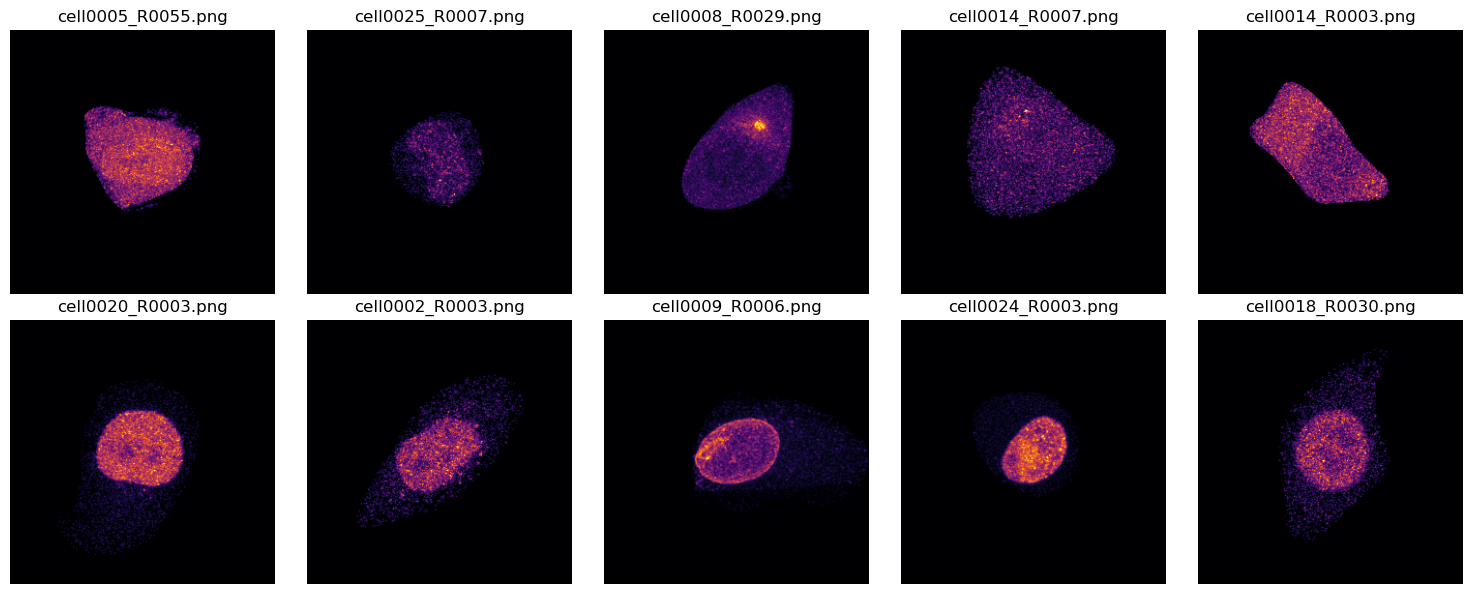

In [15]:
train_folder = "../../data/processed/mca_frame0_256/train"
test_folder  = "../../data/processed/mca_frame0_256/test"

visualize_images(train_folder, n=10)
# visualize_images(test_folder, n=10)
visualize_images(train_folder, n=10, colormap="inferno")

